
# SAR Application: Sea Ice
### I. How to create SAR quicklook images of Sea Ice?

* Useful Products: VV and HH in dB
* Useful Wavelengths: "For sea ice observations with SAR, the main radar frequencies used cover L-band (wavelength 15–30 cm, fre- quency 1–2 GHz), C-band (3.8–7.5 cm, 4–8 GHz), X-band (2.4–3.8 cm, 8–12.5 GHz), and Ku-band (1.7–2.4 cm, 12.5–18 GHz)" (Dierking, 2013). "Only the phase difference between the HH- and the VV-polarized channels reveals use- ful information related to the dominant scattering mechanisms from which ice properties can be inferred and ice types discriminated (Drinkwater et al., 1991)"
* Instructions to View:
* Qualitative Browse Products:


### II. How to interpret SAR images of Sea Ice?

Young sea ice has a lower backscatter signature relative to older/thicker sea ice. "Newly formed sea ice has been observed to be around 4–5 dB lower than, e.g., first-year ice in both C- and L-band SAR. Similar results have been found in many other studies, where newly formed sea ice was reported to have backscatter values of −25 dB." (Johansson et. al, 2020)


## Beaufort Sea

The content of this notebook is as follows:
1. [Running the Notebook](#s1)
2. [Sea Ice Background](#s2)
3. [UAVSAR Collection Beaufort Sea](#s3)
4. [VV Geotiffs](#s4)

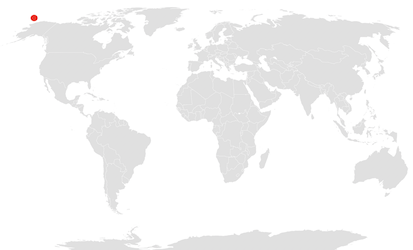

<a name="s1"></a>
## 1. Running the Notebook
- This Notebook has both "text" and "code" cells. The text cells have text descriptions about running the notebooks and data interpretation.
- Code cells are a light gray and a "play" button appears in the upper left corner when your mouse is hovered over the cell.
- To run the content in the code cells, **select the play button** in the upper left corner of each code cell or **press shift-enter**.

### Python Packages:
This routine using the following python libaries. Some are already included in the Google Colab environment and others are installed in the cell below before imported. Downloading new python packages to this environment may take a few minutes to complete.

In [4]:
!pip install rasterio --quiet

import rasterio as rio
import math
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wg
from IPython.display import Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 41.7 MB/s eta 0:00:00


<a name="s2"></a>
## 2. Beaufort Sea Ice

From Dierking 2013, Sea ice occurs in different stages of development:
* Drifting pack ice - major fraction of sea ice that responds to forces from the wind and ocean currents
* In the initial phase of ice growth, ice crystals appear in the uppermost water layer (frazil and grease ice).
* Under calm ocean conditions, smooth, elastic ice crusts up to 10 cm thick (called nilas) develop, followed by the stage of young ice (10–30 cm thick).
* If the ocean surface is roughened by wind, ice crystals accumulate to create pancake ice rounded ice floes, often with rimmed edges caused by numerous collisions between single floes.
* Eventually, young ice or pancakes increase in thickness, and pancakes freeze together to form a closed ice cover. When the ice is 30–200 cm thick, it is called first-year ice. Multiyear ice is typically more than 2 m thick.

The pictures below were taken from the Office of Naval Research (ONR) Sea State Field Campaign September-November 2015. The upper right corner is nilas sea ice, the lower left corner is pancake ice, the lower right corner is multiyear ice (MYI). (Image Credit: Ben Holt, JPL)

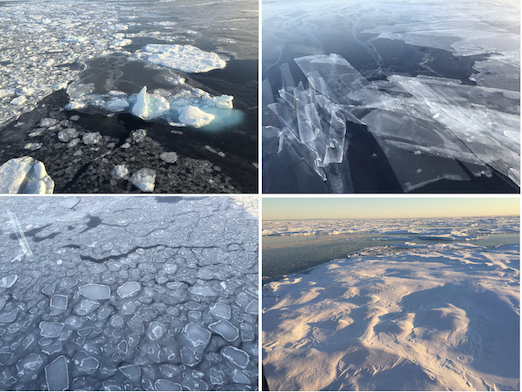

<a name="s3"></a>
## 3. UAVSAR Collection Beaufort Sea

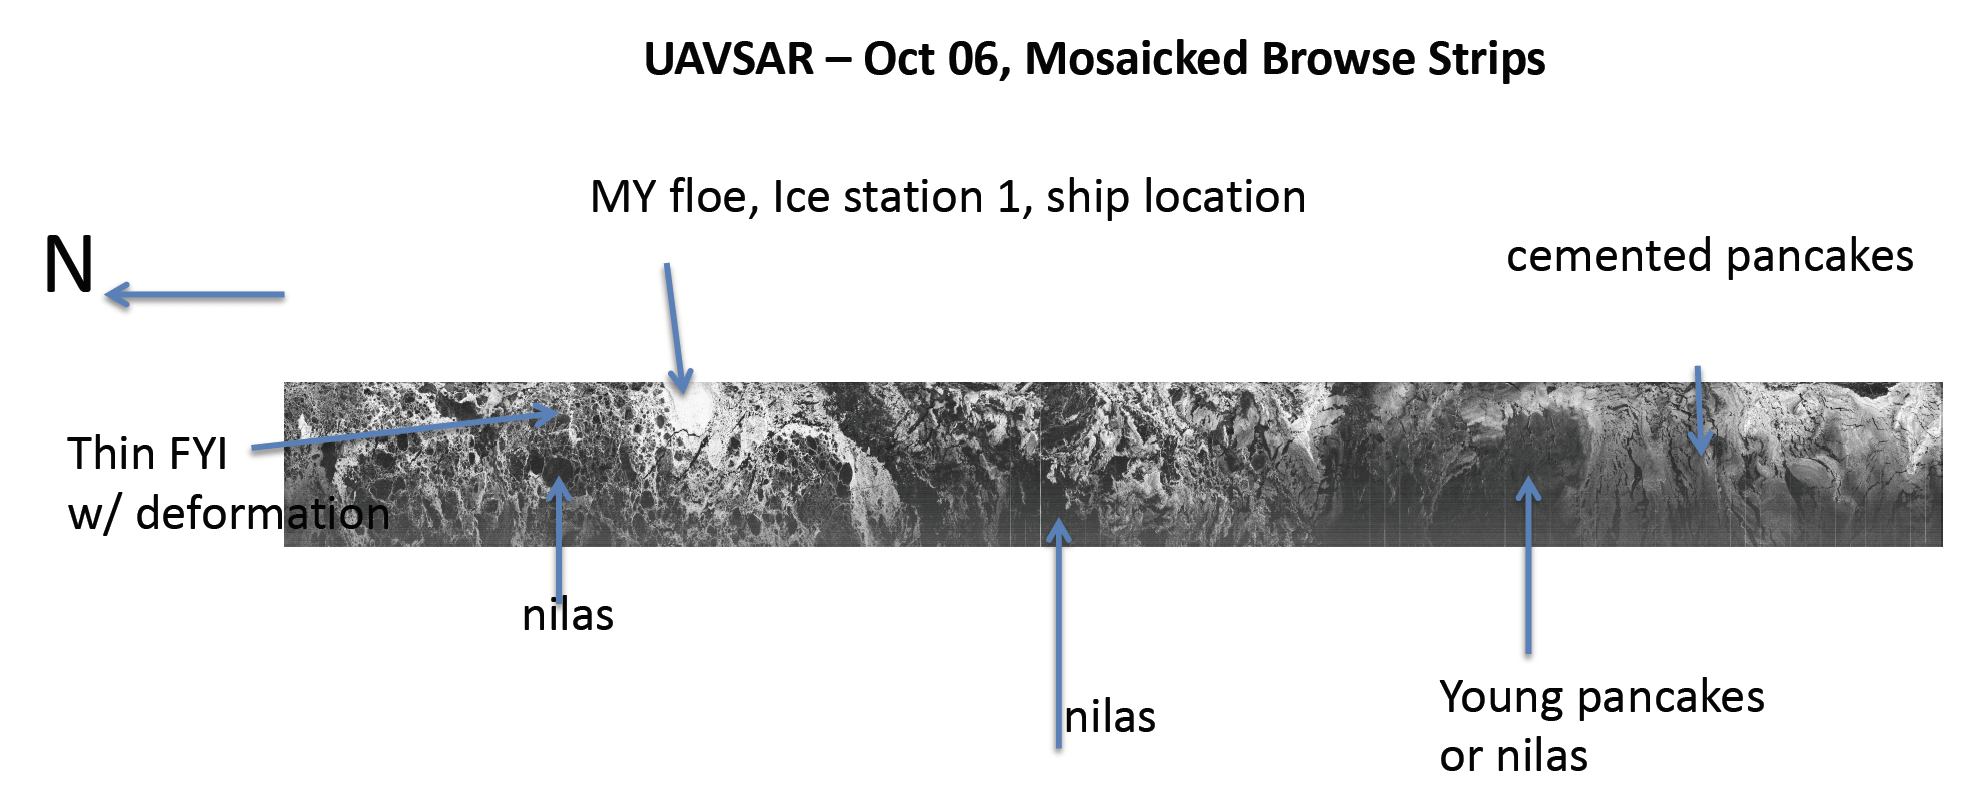

Image Credit: Ben Holt

The figure above labels different sea ice types from the October 06, 2015 UAVSAR line collected over the Beaufort Sea.

* Thin FYI = First-Year Ice
* Nilas
* MY floe = Multi-Year Ice Floe
* Young pancakes
* Cemented pancakes


<a name="s4"></a>
## 4. VV Geotiffs

The UAVSAR line (beaufo_01104_15148_000_151006_L090_CX_01) captures multiple ice types and regions of nilas, young pancake, cemented pancake, and floe regions are plotted below. UAVSAR line data page: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=beaufo_01104_15148_000_151006_L090_CX_03#data


First, fetch UAVSAR geotiffs with wget.

In [1]:
## UAVSAR
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_CX_03_cemented_pancakes.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_CX_03_floe.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_CX_03_nilas.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_CX_03_young_pancakes.tif --quiet

## NISAR simulated products
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_NISAR_cemented_pancakes.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_151006_L090VVVV_NISAR_floe.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_NISAR_nilas.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Sea_Ice/beaufo_01104_15148_000_151006_L090VVVV_NISAR_young_pancakes.tif --quiet

Read in UAVSAR VV geotiffs and convert to decibels (dB).


In [6]:
def read_file(path):
    with rio.open(path) as ds:
        band = ds.read(1)
    return band

def convert_db(data):
    db = 10*(math.log10(data))
    return db

convert_db = np.vectorize(convert_db)

## Sea Ice line split into segments
young_pancakes = read_file('beaufo_01104_15148_000_151006_L090VVVV_CX_03_young_pancakes.tif')
cemented_pancakes = read_file('beaufo_01104_15148_000_151006_L090VVVV_CX_03_cemented_pancakes.tif')
nilas = read_file('beaufo_01104_15148_000_151006_L090VVVV_CX_03_nilas.tif')
floe = read_file('beaufo_01104_15148_000_151006_L090VVVV_CX_03_floe.tif')

## Convert to decibels
young_pancakes = convert_db(young_pancakes)
cemented_pancakes = convert_db(cemented_pancakes)
nilas = convert_db(nilas)
floe = convert_db(floe)

## NISAR Simulated
young_pancakes_nisar = read_file('beaufo_01104_15148_000_151006_L090VVVV_NISAR_young_pancakes.tif')
cemented_pancakes_nisar = read_file('beaufo_01104_15148_000_151006_L090VVVV_NISAR_cemented_pancakes.tif')
nilas_nisar = read_file('beaufo_01104_15148_000_151006_L090VVVV_NISAR_nilas.tif')
floe_nisar = read_file('beaufo_01104_15148_151006_L090VVVV_NISAR_floe.tif')

young_pancakes_nisar = convert_db(young_pancakes_nisar)
cemented_pancakes_nisar = convert_db(cemented_pancakes_nisar)
nilas_nisar = convert_db(nilas_nisar)
floe_nisar = convert_db(floe_nisar)

Plot UAVSAR subsets over different sea ice types. Thicker, older ice have higher dB values and appear brighter in the plots below.

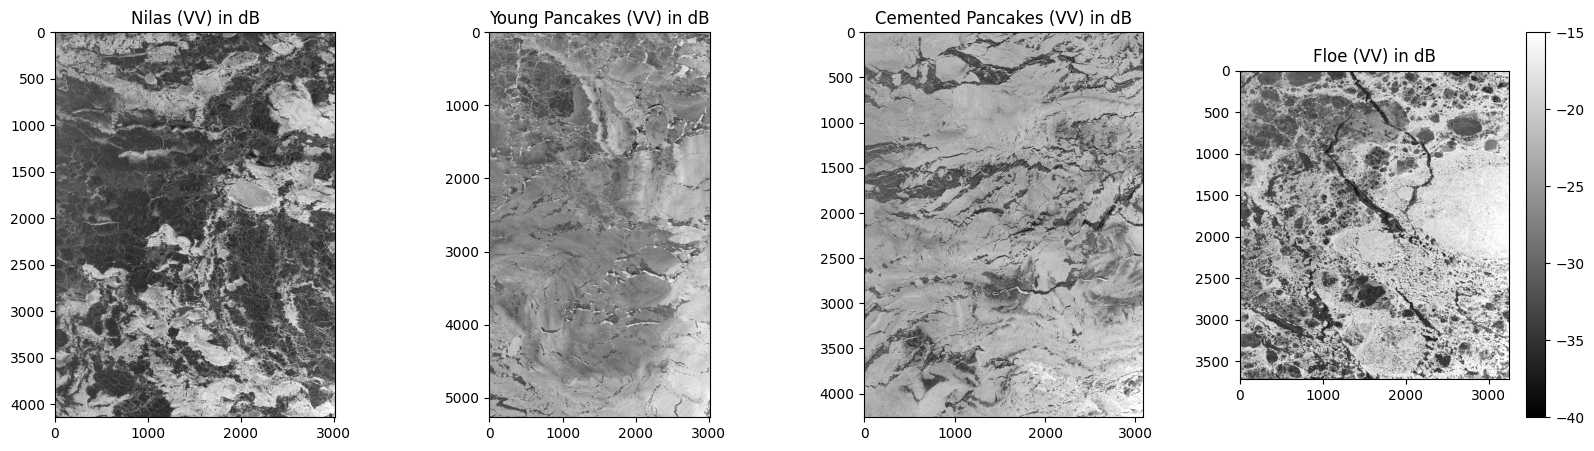

In [7]:
## Plot UAVSAR Sea Ice line
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

nilas_plot = ax[0].imshow(nilas, vmin=-40, vmax=-15, cmap='gray')
ax[0].set_title('Nilas (VV) in dB')
# fig.colorbar(nilas_plot, ax=ax[0])

young_pancakes_plot = ax[1].imshow(young_pancakes, vmin=-40, vmax=-15, cmap='gray')
ax[1].set_title('Young Pancakes (VV) in dB')
# fig.colorbar(young_pancakes_plot, ax=ax[1])

cemented_pancakes_plot = ax[2].imshow(cemented_pancakes , vmin=-40, vmax=-15, cmap='gray')
ax[2].set_title('Cemented Pancakes (VV) in dB')
# fig.colorbar(cemented_pancakes_plot, ax=ax[2])

floe_plot = ax[3].imshow(floe , vmin=-40, vmax=-15, cmap='gray')
ax[3].set_title('Floe (VV) in dB')
fig.colorbar(floe_plot, ax=ax[3])

Plot histograms of VV geotiffs

Text(0.5, 0, 'decibel (dB)')

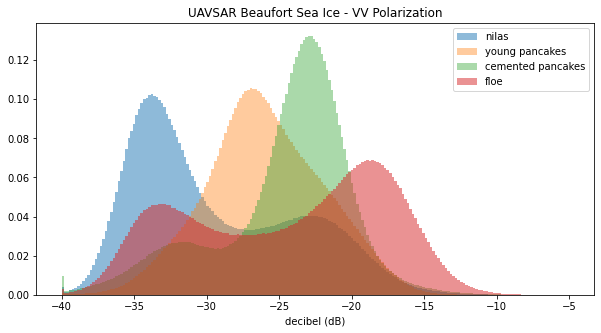

In [ ]:
n = 200
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(np.clip(nilas.ravel(),-40,-5), density=True, bins=n, alpha=0.5, label='nilas')
ax.hist(np.clip(young_pancakes.ravel(),-40,-5), density=True, bins=n, alpha=0.4, label='young pancakes')
ax.hist(np.clip(cemented_pancakes.ravel(),-40,-5), density=True, bins=n, alpha=0.4, label='cemented pancakes')
ax.hist(np.clip(floe.ravel(),-40,-5), density=True, bins=n, alpha=0.5, label='floe')
ax.set_title('UAVSAR Beaufort Sea Ice - VV Polarization')
ax.legend(prop={'size': 10})
ax.set_xlabel('decibel (dB)')

## NISAR Simulated Products

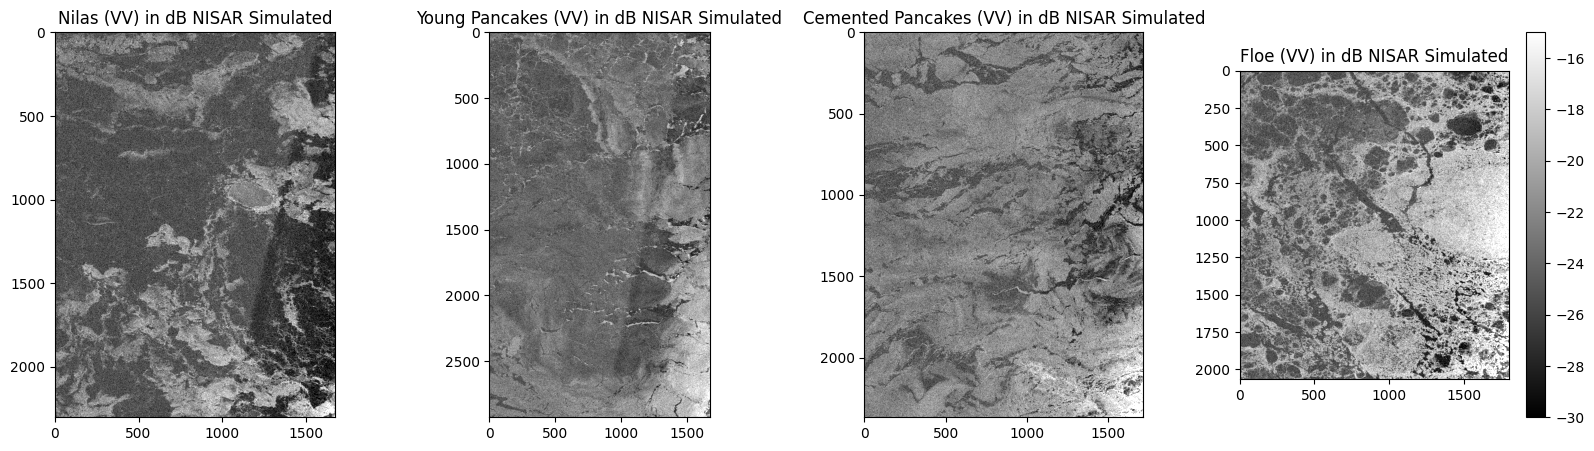

In [10]:
## Plot UAVSAR Sea Ice line
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

vmin = -30
vmax = -15

nilas_plot = ax[0].imshow(nilas_nisar, vmin=vmin, vmax=vmax, cmap='gray')
ax[0].set_title('Nilas (VV) in dB NISAR Simulated')
# fig.colorbar(nilas_plot, ax=ax[0])

young_pancakes_plot = ax[1].imshow(young_pancakes_nisar, vmin=vmin, vmax=vmax, cmap='gray')
ax[1].set_title('Young Pancakes (VV) in dB NISAR Simulated')
# fig.colorbar(young_pancakes_plot, ax=ax[1])

cemented_pancakes_plot = ax[2].imshow(cemented_pancakes_nisar , vmin=vmin, vmax=vmax, cmap='gray')
ax[2].set_title('Cemented Pancakes (VV) in dB NISAR Simulated')
# fig.colorbar(cemented_pancakes_plot, ax=ax[2])

floe_plot = ax[3].imshow(floe_nisar , vmin=vmin, vmax=vmax, cmap='gray')
ax[3].set_title('Floe (VV) in dB NISAR Simulated')
fig.colorbar(floe_plot, ax=ax[3])

Text(0.5, 0, 'decibel (dB)')

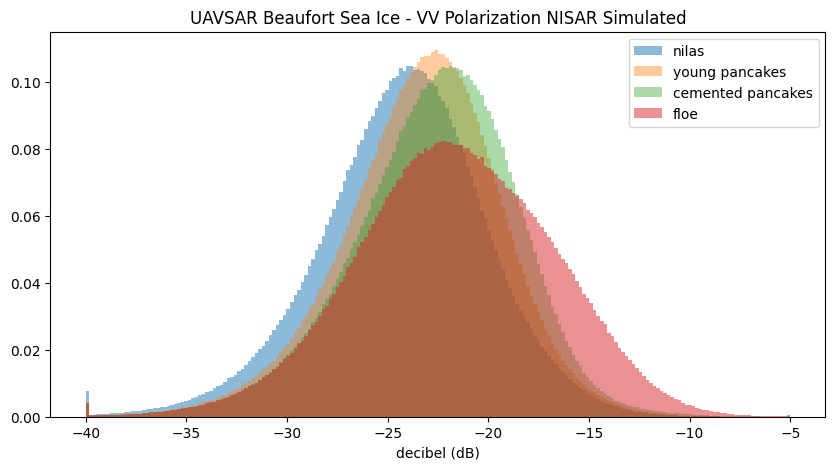

In [9]:
n = 200
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(np.clip(nilas_nisar.ravel(),-40,-5), density=True, bins=n, alpha=0.5, label='nilas')
ax.hist(np.clip(young_pancakes_nisar.ravel(),-40,-5), density=True, bins=n, alpha=0.4, label='young pancakes')
ax.hist(np.clip(cemented_pancakes_nisar.ravel(),-40,-5), density=True, bins=n, alpha=0.4, label='cemented pancakes')
ax.hist(np.clip(floe_nisar.ravel(),-40,-5), density=True, bins=n, alpha=0.5, label='floe')
ax.set_title('UAVSAR Beaufort Sea Ice - VV Polarization NISAR Simulated')
ax.legend(prop={'size': 10})
ax.set_xlabel('decibel (dB)')

## Other Resources

UAVSAR data download: https://uavsar.jpl.nasa.gov/cgi-bin/data.p

Video about Field Campaign: https://apl.uw.edu/project/project.php?id=arctic_sea_state

## References

Dierking, W. (2013). Sea Ice Monitoring by Synthetic Aperture Radar. Oceanography, 26(2). doi:10.5670/oceanog.2013.33

Johansson, A. M., Espeseth, M. M., Brekke, C., & Holt, B. (2020). Can Mineral Oil Slicks Be Distinguished From Newly Formed Sea Ice Using Synthetic Aperture Radar? IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 13, 4996–5010. doi:10.1109/jstars.2020.3017278

Thomson, J., Ackley, S., Girard‐Ardhuin, F., Ardhuin, F., Babanin, A., Boutin, G., et. al (2018). Overview of the Arctic Sea State and Boundary Layer Physics Program. Journal of Geophysical Research: Oceans, 123(12), 8674–8687. doi:10.1002/2018jc013766

ONR Sea State Field Campaign, Sept. 29- Nov.10, 2015

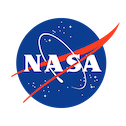


The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2021. California Institute of Technology. Government sponsorship acknowledged.